## Lab 6, Problem 1

a) mnist_test.zip contains 10,000 images of handwritten digits following the name scheme
test_XXXXX.gif
where XXXXX is an integer with a field length of 5 and padding zeros. In addition, the archive contains
a text file called labels.txt that holds the labels of the images, where line 1 corresponds to the first
image, line 2 to the second image, and so on. Create a folder data and unzip the contents of the
archive using

        unzip -q mnist_test.zip -d data/

b) Create a 1D Numpy array labels and read in all labels from labels.txt.

In [1]:
from PIL import Image
import numpy as np
import os

# Read labels.txt to get the labels
with open("data/labels.txt", 'r') as f:
    labels = np.array([int(line.strip()) for line in f])

c) Create a 3D Numpy array test. The first dimension shall represent the image index (0 to 9999) while
the second and third dimension represent the image pixels.

In [2]:
images = np.zeros((10000, 28, 28))

d) Generate a list of all images imgNames using list comprehension. 

Hint: If your images are within a folder test/ (relative to the Notebook), you can use

        filename = " test / test_ " + str ( i ) . zfill ( len ( str ( n ) ) ) + " . png "

where i is the image index and n is the total number of images. You can also try listdir from the
os module.

In [3]:
image_names = [f'test_{i:05d}.gif' for i in range(10000)]

e) Iterate through all image files. In every iteration, load the associated image file, convert it to a Numpy
array, divide it by 255 to normalize it to 1 and store it in test.

In [4]:
for i, img_name in enumerate(image_names):
    img_path = os.path.join("data/", img_name)
    with Image.open(img_path) as img:
        images[i] = np.array(img) / 255
 
labels.shape
# images[0]

(10000,)

## Lab 6, Problem 2

a) Open Microsoft Paint, click on the Home ribbon, select resize and set the image size to 128 x 128
pixels. Feel free to adjust the zoom level in the lower right part of the window. Select the Brush tool,
chose the largest line size available and black color. Draw your favourite digit (0-9) and save it in the
GIF format. Make sure that your hand-drawn digit fills the canvas and is nicely centred with roughly
20 pixels margin to the top, bottom, left and right.


<center><img src="MyFile.gif" width="128" height="128"> </center>


b) Use Pillow to load your hand-drawn number into a Jupyter notebook via:

        img = Image.open(filename).convert(’L’) 

Call the rescaling method to downscale your image to 28 x 28 pixels.

        imgRe = img.resize(size = (imgSize, imgSize))



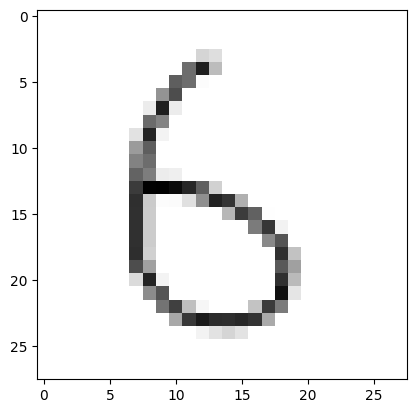

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
 
filename = 'MyFile.gif'
 
# Load to grayscale ('L')
img = Image.open(filename).convert('L')
 
# Rescaling the image to 28x28 pixels
imgSize = 28
imgRe = img.resize((imgSize, imgSize))
 
# Display the rescaled image
plt.imshow(imgRe, cmap='gray')
plt.show()

c) Use plt .subplots to generate a single plot of five MNIST images of your digit. Discuss differences and
similarities between your handwriting and the MNIST sample.

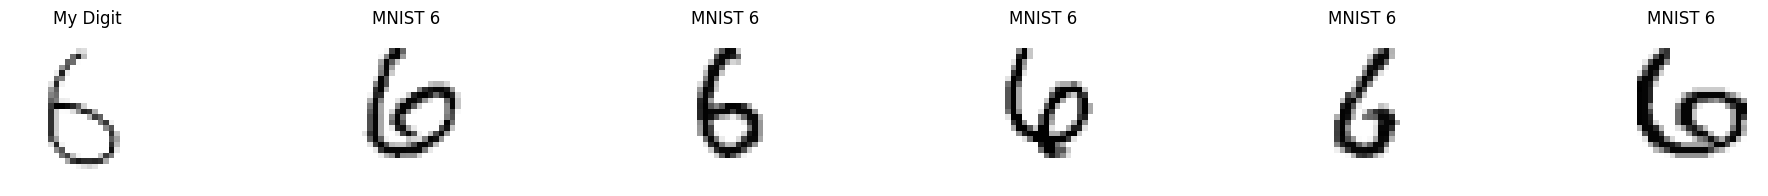

In [6]:
my_digit = 6
 
# Find indices where the MNIST are 6
indices = np.where(labels == my_digit)[0][:5]
 
fig, axes = plt.subplots(1, 6, figsize=(24, 2))
 
# My beautiful 6
axes[0].imshow(imgRe, cmap='gray') 
axes[0].set_title('My Digit')
axes[0].axis('off')
 
# MNIST loop
for i, idx in enumerate(indices):
    axes[i+1].imshow(images[idx], cmap='gray')
    axes[i+1].set_title(f'MNIST {my_digit}')
    axes[i+1].axis('off')

plt.show()

## Lab 6, Problem 3

a) Copy all the code that is required to create an instance of the class neuralNetwork.

In [7]:
def sigmoid(x):  # Sigmoid Function
    return 1 / (1 + np.exp(-x))

In [8]:
class neuralNetwork:
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        # Number of input, hidden and output nodes
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes  
        # Weight matrices, wih and who, initialized with random numbers that follow a normal distribution
        self.wih = np.random.normal(0.0, 0.5, (self.hNodes,self.iNodes))
        self.who = np.random.normal(0.0, 0.5, (self.oNodes,self.hNodes))   
        # Learning rate (for session 7)
        self.lRate = lRate
        # Activation function is the sigmoid function
        self.actFunc = sigmoid
    
    def __str__(self):
        return f"Input nodes: {self.iNodes}, Hidden nodes: {self.hNodes}, Output nodes: {self.oNodes}, Learning rate: {self.lRate}, wih matrix shape: {self.wih.shape}, who matrix shape: {self.who.shape}"
        
    def query(self, imgArr):
        # Transform the image into a vector    
        inputs = imgArr.flatten()
        # Move signal into hidden layer
        hiddenInputs = np.dot(self.wih, inputs)
        # Apply the activation function
        hiddenOutputs = self.actFunc(hiddenInputs)
        # Move signal into output layer
        outputs = np.dot(self.who, hiddenOutputs)
        # Apply the activation function
        prediction = self.actFunc(outputs)
        return prediction 

b) Write a function softmax(arr) that applies the softmax operation to a Numpy array:

<img src="equation.jpg" width="350" height="107">


The softmax operation is commonly used to normalize the output layer in multi-class models to get a
probabilistic vector.

In [9]:
def softmax(arr):
    e_x = np.exp(arr - np.max(arr))
    return e_x / e_x.sum()

c) Use the network’s query method to feed your handwritten digit into the network. Divide the image
array by 255 before you pass it to the query method. Apply the softmax function to the output vector
and verify that the sum of its entries equals 1.

In [12]:
iNodes = 784 # The images are 28x28 pixels
hNodes = 100 # An educated guess
oNodes = 10 # Ten digits

lRate = 0.3 # More on that next week

neural_net = neuralNetwork(iNodes, hNodes, oNodes, lRate) # Create an instance of the network

# Normalize image array
input_data = (np.array(imgRe).reshape((imgSize * imgSize))) / 255

output = neural_net.query(input_data)
 
softmax_output = softmax(output) # Normalize
 
# Verify
print("Sum of softmax output:", softmax_output.sum())

Sum of softmax output: 1.0
